# Johnson and Shot Noise Analysis (2024)

#### This template assumes use of the new shot noise source

Use this template to carry out the analysis tasks for the Noise experiment.  For reference, here are links to recommended Python resources: the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.
## First, import some packages

This is a good idea at the beginning of your notebook to include the packages that you will need.  We will use those shown below here.  A brief description:
* `numpy` is the foundational package for Python numerical work. It extends and speeds up array operations beyond standard Python, and it includes almost all math functions that you would need for example `sqrt()` (square root) or `cos()` (cosine).  These would be written in code as `np.sqrt()` or `np.cos()`.
* `scipy` is a huge collection of scientific data analysis functions, routines, physicical constants, etc.  This is the second most used package for scientific work. Here we will use the physical constants library, `scipy.constants`.  Documentation is at [SciPy.org](https://docs.scipy.org/doc/scipy/reference/) with the constants subpackage at https://docs.scipy.org/doc/scipy/reference/constants.html.
* `uncertainties` is a very useful small package that simplifies uncertainty propagation and printing out of quantities with uncertainty. Documentation is at https://pythonhosted.org/uncertainties/
* `matplotlib` is *the* standard plotting package for scientific Python.  We will use a subset called `pyplot` which is modeled after the plotting functions used in MATLAB. The last line below, `%matplotlib inline`, simply forces the plots to appear within the notebook.
* `pandas` is a large data science package.  It's main feature is a set of methods to create and manipulate a "DataFrame," which is an enlargement of the idea of an array.  I plays well with NumPy and other packages.  We will use it mainly as a way to read files into data sets in an easy way.

We will also use the [LMFit](https://lmfit.github.io/lmfit-py/) package to make line fits.  This will be explained later in the notebook.

In [55]:
# Run this cell with Shift-Enter, and wait until the 
# asterisk changes to a number, i.e., [*] becomes [1]
import numpy as np
import scipy.constants as const
import uncertainties as unc
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Johnson Noise Analysis

## Exercise 1 -  Data reduction
### Read in the raw data

**About Data Files:** This template assumes that the data files will have one of two types of structure: 
1. If you took 5 readings (or so) for each measurement and plan to average them here, the assumed structure is one where each spreadsheet column is named with the resistance (for Johnson Noise), e.g., "9.99k", or the emission current (for shot noise), e.g., "0.1047mA" and each row of the data is one trial with each cell containing the measured RMS voltage in the frequency band; 
2. If you opted instead to simply take one longer-average time measurement for each resistance (or emission current), then the assumed structure would be two columns, the first column headed with resistance (or emission current) and the second column headed with the measured RMS voltage in the frequency band.

Below, these structures are treated by the designation "1" or "2".  Stucture type "1" requires a little more effort to reduce, but offers the option of calculating data point uncertainties. 

**Advice:** Use the **Pandas** function `read_csv()` to pull the file into a Pandas Dataframe, like this:

    johnson_294 = pd.read_csv('Johnson_294K.csv')

If the last line in the code cell is the name of the DataFrame (`johnson_294`), the notebook cell will print a nice table.

You may obtain the arrays for each column by using the column label, e.g., `johnson_294['40.0k']` is the array of the first column.

In [56]:
## Lines below show how to read in a CSV data set and display it.

jdata = pd.read_csv('ex1_data_mess.csv')
jdata['R (Ω)'] = jdata['R (kΩ)'] * 1000
jdata['Vrms 295 K (V)'] = jdata['Vrms 295 K']
jdata['Vrms 77 K (V)'] = jdata['Vrms 77 K']
jdata  # DataFrame name on the last line spits out a table

Troom = 273.15 + 22
Tln2 = 77

bandwidth = 1000

### Massage the raw data

#### For data structure type "1."  If you have a type "2" data structure, skip to "Plot the Reduced Data" below.

Create new arrays that have averages of the 5 readings at each value of the resistance and their standard deviation.  Then extract the resistance from the column label and make into a number.  Finally, build a new DataFrame that has these arrays. Below is an example.  The example shows a number of useful operations.  Study it carefully.

We will use a loop to build the new arrays first, and then combine them into a DataFrame.

You can extract the resistance from the column heading. Here is one way to do it, assuming `col_label` is the column label:

    resistance = float(col_label.split('k')[0])
    
This splits the label at `k` and puts the number into the first (0) position as a string.  `float()` converts the number string to a flaoting point number.

Then calculate the mean and standard deviation using the built-in methods for the arrays.

#### Repeat for the other temperature 

Now you try it for the other temperature data set.

In [57]:
## Read in the data set and display it


In [58]:
## Calculate the averages of each column.
## extract the values of the resistance.  
## Build a (new) dataframe and display it to see if it looks right.


### Plot the reduced data

Plot the data set of $V_{rms}$ vs $R$ to see what it looks like.

Below, I'll show how. Study the commands, change them, and see what happens.  Hint: study the sections in the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) on Matplotlib. 

After you make the plot, always look to make sure your data set does not have any weird points. This is a good way to catch bad data and/or mistakes.

In [59]:
# Set up plot defaults  This cell only needs to be executed once.
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = 10.0, 8.0  # Roughly 11 cm wde by 8 cm high
mpl.rcParams['font.size'] = 12.0  # Use 12 point font

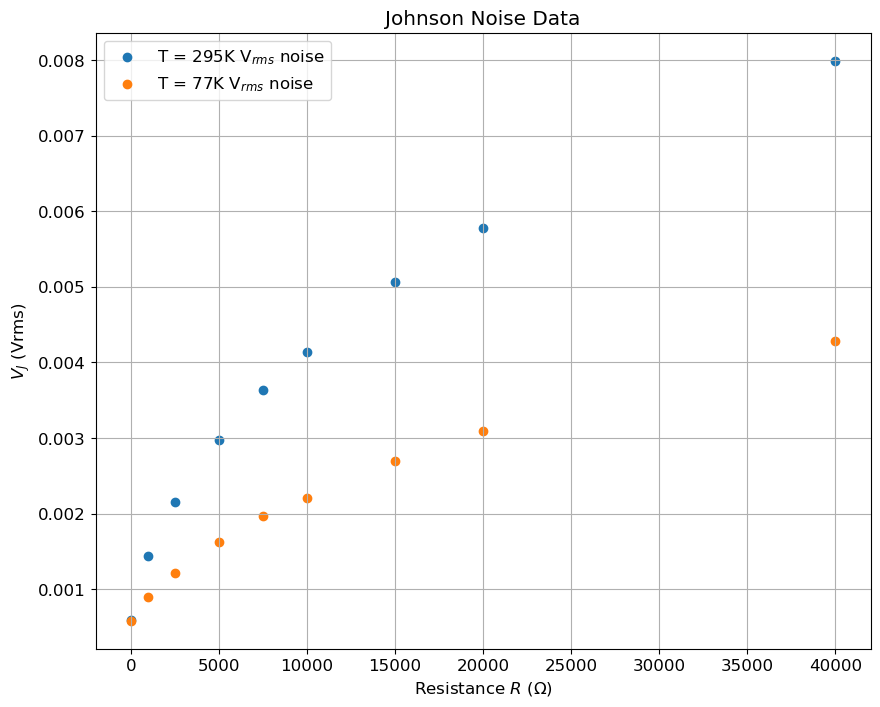

In [60]:
## Plot the data sets on one graph
## Header commands provided

plt.grid()  # Turn on the grid
plt.title('Johnson Noise Data')  # make a plot title
plt.ylabel(r'$V_J$ (Vrms)')  # Make an axis label.  Note the $$ to typeset math
plt.xlabel(r'Resistance $R$ ($\Omega$)')  #Another axis label

# Below shows how to make a plot with error bars.  The errors are multiplied by 
# 10 so that the bars are visible. 

# If you have no error bars, simply omit the item 'yerr=J_294['DV (V)']*10'

plt.scatter(jdata['R (Ω)'], jdata['Vrms 295 K (V)'],
            marker='o', label='T = 295K V$_{rms}$ noise')
plt.scatter(jdata['R (Ω)'], jdata['Vrms 77 K (V)'],
            marker='o', label='T = 77K V$_{rms}$ noise')
plt.legend();  # Make a legend

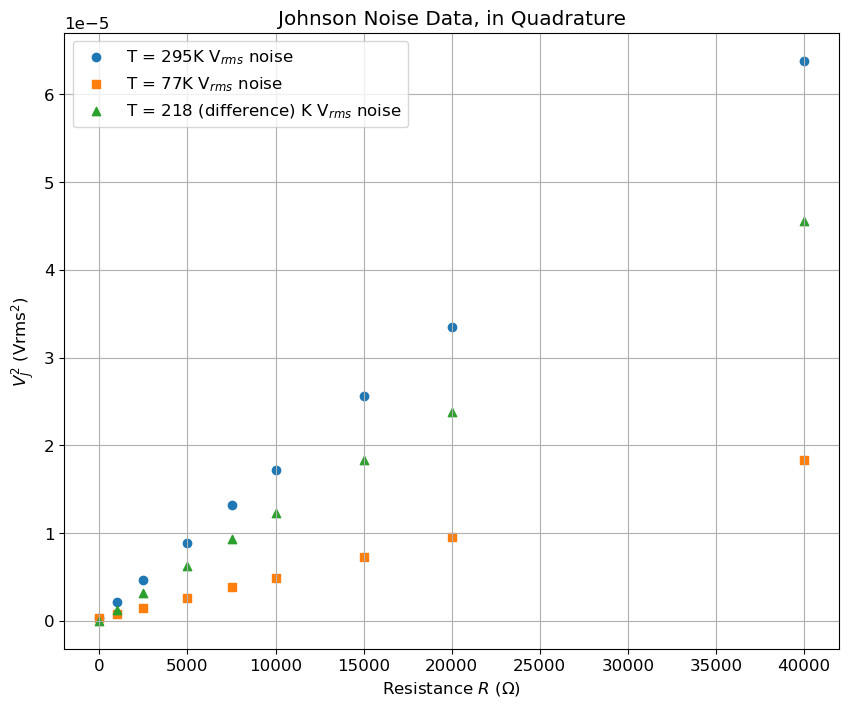

In [61]:
## Plot the results
## Header commands provided to format plot

plt.grid()
plt.title('Johnson Noise Data, in Quadrature')
plt.ylabel(r'$V^2_J$ (Vrms$^2$)')
plt.xlabel(r'Resistance $R$ ($\Omega$)')
## Add your code here
plt.scatter(jdata['R (Ω)'], jdata['Vrms 295 K (V)'] ** 2,
            marker='o', label='T = 295K V$_{rms}$ noise')
plt.scatter(jdata['R (Ω)'], jdata['Vrms 77 K (V)'] ** 2,
            marker='s', label='T = 77K V$_{rms}$ noise')
plt.scatter(jdata['R (Ω)'], jdata['Vrms 295 K (V)'] ** 2 - jdata['Vrms 77 K (V)'] ** 2,
            marker='^', label='T = 218 (difference) K V$_{rms}$ noise')
plt.legend();

### Part b. Fit the modified data

To fit the data set to a line, make use of the **LMFit** package. It is a useful add-on to the SciPy fitting functions.  This package simplifies fitting data to a variety of standard functions.  See the [Lmfit Documentation](https://lmfit.github.io/lmfit-py/index.html) for a full discussion.  The package is quite powerful, but for basic fitting with common functions, it is very easy to use.  

#### Example: Fitting a line

The example below shows how to use the package to fit data to a line, obtain the fit parameters along with uncertainties, and then plot the data and fit. Execute the cells and study how it works.
(Note: the data come from a calibration problem in physics 331)

The following cell executes the fitting calculations.

Fit each to a line and obtain the slope with uncertainty.  Plot the data with the fit lines.

First, I'll make functions to clean up the coding.

In [62]:
## Defines a function to do the work.  Study it.  If you don't understand how this works,
## find out by asking questions and or studying the functions in the code.
from lmfit.models import LinearModel

line = LinearModel()


def line_fit_and_plot(xdata, ydata, yerr=None, model=LinearModel(), xlabel='X', ylabel='Y'):
    '''
    Fit a line or curve, and plot/show the fit results.
    The function returns a parameters object with the fit parameters
    '''
    param_guess = model.guess(ydata, x=xdata)
    if (yerr is None):
        model_fit = model.fit(ydata, param_guess, x=xdata)
    else:
        model_fit = model.fit(ydata, param_guess, x=xdata, weights=1 / yerr)
    print(model_fit.fit_report(show_correl=False))
    model_fit.plot()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);
    return model_fit.params


## This function use the Uncertainties function to make an uncertainty object

def get_uslope(params):
    return unc.ufloat(params['slope'].value, params['slope'].stderr)
def get_uqslope(params):
    return unc.ufloat(params['b'].value, params['b'].stderr)

def get_uint(params):
    return unc.ufloat(params['intercept'].value, params['intercept'].stderr)
def get_uqint(params):
    return unc.ufloat(params['c'].value, params['c'].stderr)

Then run the functions.

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 9
    # variables        = 2
    chi-square         = 2.5164e-12
    reduced chi-square = 3.5949e-13
    Akaike info crit   = -256.148595
    Bayesian info crit = -255.754146
    R-squared          = 0.99922395
[[Variables]]
    slope:      1.5909e-09 +/- 1.6757e-11 (1.05%) (init = 1.590906e-09)
    intercept:  9.4617e-07 +/- 2.7441e-07 (29.00%) (init = 9.461732e-07)

Slope = (1.591±0.017)×10⁻⁹
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 9
    # variables        = 2
    chi-square         = 7.0616e-14
    reduced chi-square = 1.0088e-14
    Akaike info crit   = -288.308654
    Bayesian info crit = -287.914205
    R-squared          = 0.99972838
[[Variables]]
    slope:      4.5058e-10 +/- 2.8072e-12 (0.62%) (init = 4.505826e-10)
    intercept:  4.1632e-07 +/- 4.5969e-08

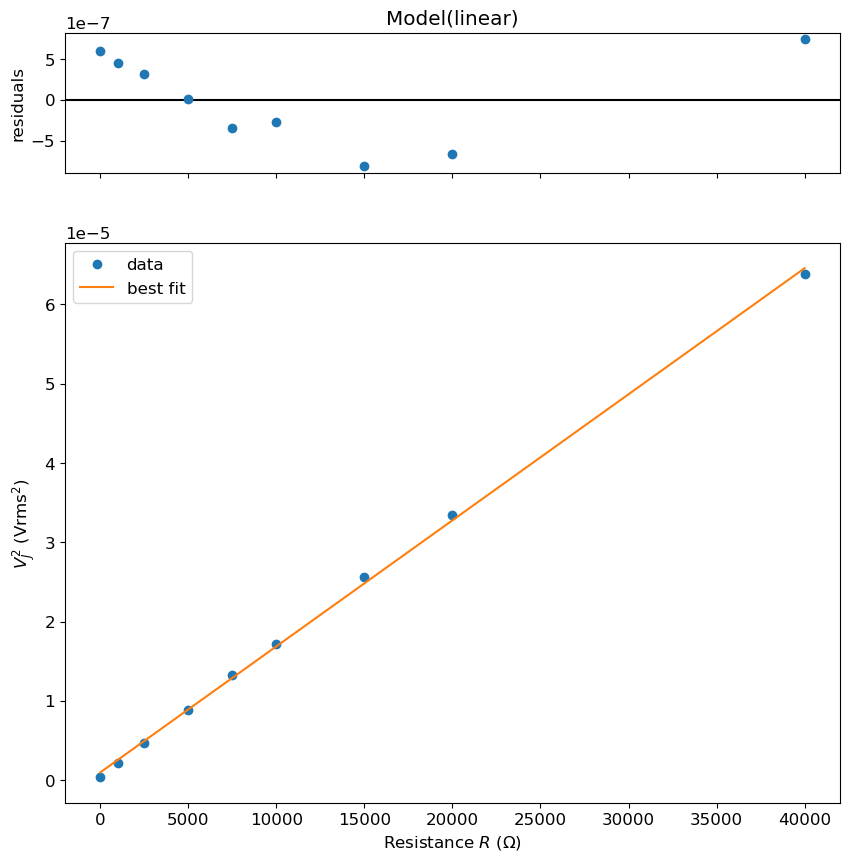

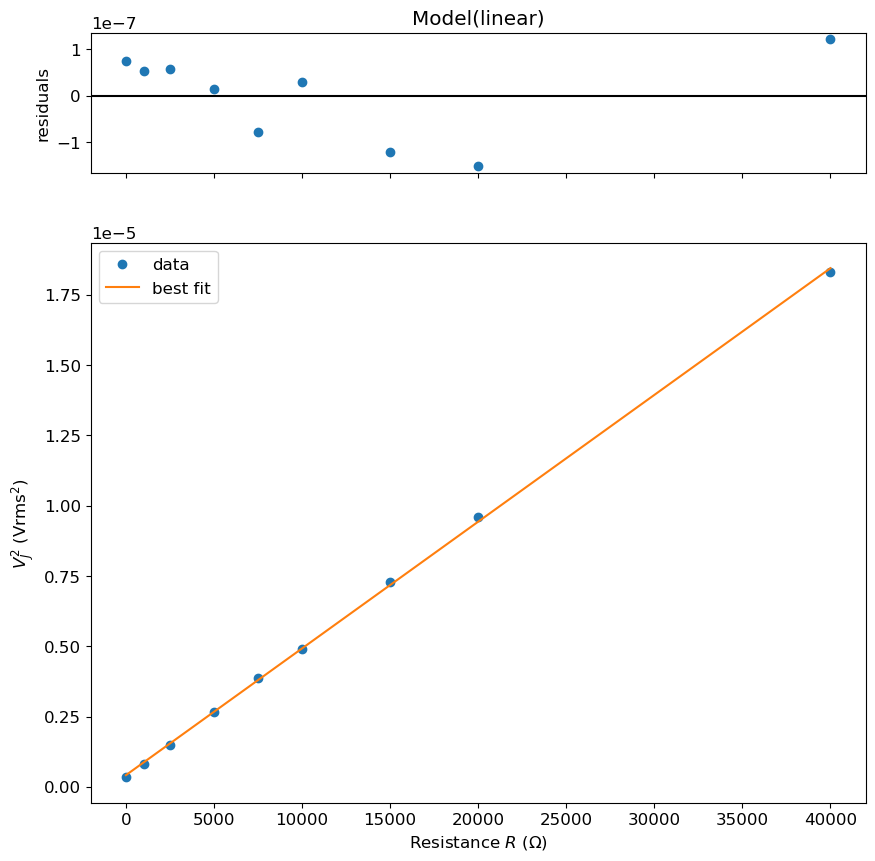

In [63]:
## Use the functions above to run the fit for the modified 295K data
## and save the fit parameters.  Then pull out the slope
## Here is how you would use the above functions with the example data:

# Run the fit
fit_params_295 = line_fit_and_plot(jdata['R (Ω)'], jdata['Vrms 295 K (V)'] ** 2,
                                   xlabel=r'Resistance $R$ ($\Omega$)', ylabel=r'$V^2_J$ (Vrms$^2$)')

# Obtain the slope and its uncertainty into an uncertainty object
sl295 = get_uslope(fit_params_295)
print('\nSlope = {:.2uP}'.format(sl295))

fit_params_77 = line_fit_and_plot(jdata['R (Ω)'], jdata['Vrms 77 K (V)'] ** 2,
                                  xlabel=r'Resistance $R$ ($\Omega$)', ylabel=r'$V^2_J$ (Vrms$^2$)')

# Obtain the slope and its uncertainty into an uncertainty object
sl77 = get_uslope(fit_params_77)
print('\nSlope = {:.2uP}'.format(sl77))

### Calculate a Boltzmann constant

From the results, calculate the implied Boltzmann constant (with uncertainty).

Revised gain of low-noise amplifier $G=10122\pm35$ (as of July 2021, DBP)

In [64]:
## Create uncertainties objects for the other quantities.  The first two are examples
T_295 = unc.ufloat(295.0, 1.0)  # K
T_77 = unc.ufloat(77, 1.0)
bandwidth = unc.ufloat(1000, 12.5*1000/400)
G = unc.ufloat(10122, 35)  # unitless
k_B = const.Boltzmann  # J/K Accepted value of Boltsmann constant from SciPy constants library.
# You do the rest
k295 = sl295 / (G ** 2 * 4 * T_295 * bandwidth)

## Calculate and print k_Boltzmann
# Use the following print line:
print('Boltzmann constant from T = 295K data = {:.2uP} J/K'.format(k295))
print('Accepted value = {:.4g} J/K'.format(k_B))

Boltzmann constant from T = 295K data = (1.316±0.045)×10⁻²³ J/K
Accepted value = 1.381e-23 J/K


### 77 K data
Repeat the process for the 77K data set.

In [65]:
## Repeat for the 77K data
k77 = sl77 / (G ** 2 * 4 * T_77 * bandwidth)
# Use the following print line:
print('Boltzmann constant from T = 295K data = {:.2uP} J/K'.format(k77))
print('Accepted value = {:.4g} J/K'.format(k_B))

Boltzmann constant from T = 295K data = (1.428±0.050)×10⁻²³ J/K
Accepted value = 1.381e-23 J/K


And finally, the difference data

In [66]:
## Repeat for the "difference" data (295K-77K) subracted in quadrature
slVj = sl295 - sl77
kdiff = slVj / (G ** 2 * 4 * (T_295 - T_77) * bandwidth)
# Use the following print line:
print('Boltzmann constant from T = 295K data = {:.2uP} J/K'.format(kdiff))
print('Accepted value = {:.4g} J/K'.format(k_B))

Boltzmann constant from T = 295K data = (1.276±0.046)×10⁻²³ J/K
Accepted value = 1.381e-23 J/K


### Plot everything on one graph

Make a single plot that shows all three sets of data (as points) and the three fit lines (as lines).  Include a legend.

The cell below shows how to create a fit line using an arbitrary set of x-values based on the range of x data.  It uses the example data sets.

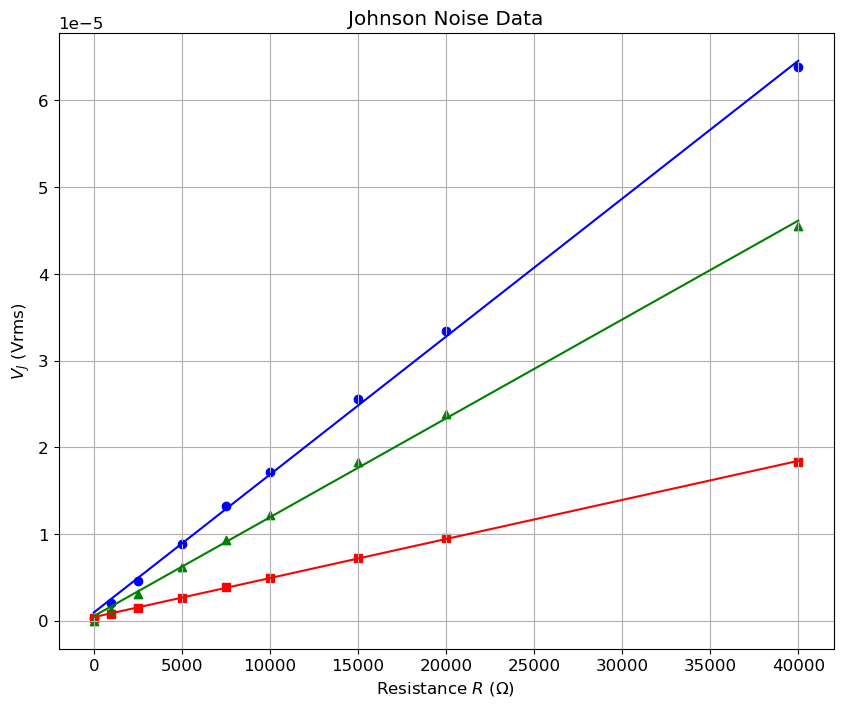

In [67]:
## Create a "fit line" based on the obtained fit parameters

xvalues = np.linspace(jdata['R (Ω)'].min(), jdata['R (Ω)'].max(),
                      100)  # create a set of 100 evenly-spaced points
y295 = line.eval(fit_params_295, x=xvalues)
y77 = line.eval(fit_params_77, x=xvalues)

plt.scatter(jdata['R (Ω)'], jdata['Vrms 295 K (V)'] ** 2,
            marker='o', label='T = 295K V$_{rms}$ noise', color='blue')
plt.plot(xvalues, y295, linestyle='-', label='T = 295K V$_{rms}$ fit', color='blue')
plt.scatter(jdata['R (Ω)'], jdata['Vrms 77 K (V)'] ** 2,
            marker='s', label='T = 77K V$_{rms}$ noise', color='red')
plt.plot(xvalues, y77, linestyle='-', label='T = 295K V$_{rms}$ fit', color='red')
plt.scatter(jdata['R (Ω)'], jdata['Vrms 295 K (V)'] ** 2 - jdata['Vrms 77 K (V)'] ** 2,
            marker='^', label='T = 218 (difference) K V$_{rms}$ noise', color='green')
plt.plot(xvalues, y295-y77, linestyle='-', label='T = 295K V$_{rms}$ fit', color='green')
plt.grid()  # Turn on the grid
plt.title('Johnson Noise Data')  # make a plot title
plt.ylabel(r'$V_J$ (Vrms)')  # Make an axis label.  Note the $$ to typeset math
plt.xlabel(r'Resistance $R$ ($\Omega$)')  #Another axis label
plt.show()


### Part c.

Summary of results for Boltsmann constant:

In [68]:
## Summarize the results in one table
## Like so:
print('  T (K)  |  k_B (J/K)   ')
print('---------|--------------------')
print('   295   | {:.1uP}'.format(k295))
print('    77   | {:.1uP}'.format(k77))
print(' 295-77  | {:.1uP}'.format(kdiff))
print('Accepted | {:10.4g}'.format(k_B))


  T (K)  |  k_B (J/K)   
---------|--------------------
   295   | (1.32±0.04)×10⁻²³
    77   | (1.43±0.05)×10⁻²³
 295-77  | (1.28±0.05)×10⁻²³
Accepted |  1.381e-23


## Exercise 3: Noise Figure

Calculate the "noise figure" for the low-noise amp, as described in the instructions.

The noise figure is defined:

$$ NF = 20\log_{10}\frac{V_{rms}(R)}{G\times\sqrt{4k_BTRB}} \; \text{dB}$$

Please limit the noise figure to 2 digits beyond the decimal point.  

Note: It clearly does not work for $R=0$.  You will need to leave this out of the calculations.

In [69]:
## Calculate the Noise figure for the various values of R at 
## room temperature and display it as a table or a plot

## Make a data frame to display
noisefig = 20*np.log10(jdata['Vrms 295 K (V)'].values[:-1]/ (G.n*np.sqrt(4 * k_B * T_295.nominal_value * jdata['R (Ω)'].values[:-1]*bandwidth.nominal_value) ))
jdata['Noise Figure (295K)'] = np.append(noisefig,0)
display(jdata)

,R (kΩ),Vrms 295 K,Vrms 77 K,R (Ω),Vrms 295 K (V),Vrms 77 K (V),Noise Figure (295K)
0,40.00,0.007990,0.004280,40000.0,0.007990,0.004280,-0.194644
1,20.00,0.005782,0.003095,20000.0,0.005782,0.003095,0.006282
2,15.00,0.005062,0.002701,15000.0,0.005062,0.002701,0.100551
3,10.00,0.004139,0.002212,10000.0,0.004139,0.002212,0.112929
4,7.50,0.003637,0.001968,7500.0,0.003637,0.001968,0.239274
5,4.99,0.002980,0.001628,4990.0,0.002980,0.001628,0.278340
6,2.50,0.002148,0.001219,2500.0,0.002148,0.001219,0.436306
7,1.00,0.001444,0.000903,1000.0,0.001444,0.000903,0.966364
8,0.00,0.000589,0.000584,0.0,0.000589,0.000584,0.000000


## Shot Noise Analysis

This is very similar to the Johnson noise analysis.

### Read in the data

For data structure type "1", column names like "0.1202mA" need to split at `m` to convert the current labels into currents.

In [70]:
## Read in the shot noise data and display it
sdata = pd.read_csv('shot_noise_data.csv')
display(sdata)

,Emission Current (mA),V_rms (V)
0,0.010,0.007520
1,0.011,0.007652
2,0.012,0.007932
3,0.013,0.008139
4,0.014,0.008260
5,0.015,0.008506
6,0.018,0.009045
7,0.026,0.010350
8,0.034,0.011520
9,0.042,0.012770


### Plot the raw data

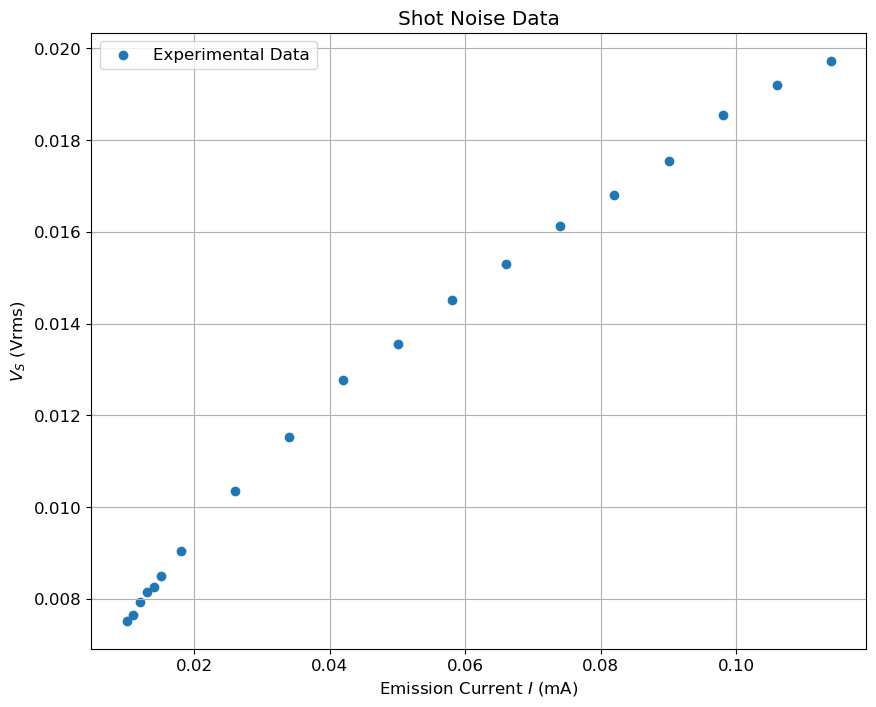

In [71]:
## Plot it
plt.figure()
plt.scatter(sdata['Emission Current (mA)'], sdata['V_rms (V)'], label='Experimental Data')
plt.grid()  # Turn on the grid
plt.title('Shot Noise Data')  # make a plot title
plt.ylabel(r'$V_S$ (Vrms)')  # Make an axis label.  Note the $$ to typeset math
plt.xlabel(r'Emission Current $I$ (mA)')  #Another axis label
plt.legend()
plt.show()

### Calculate $V^2_{rms}$

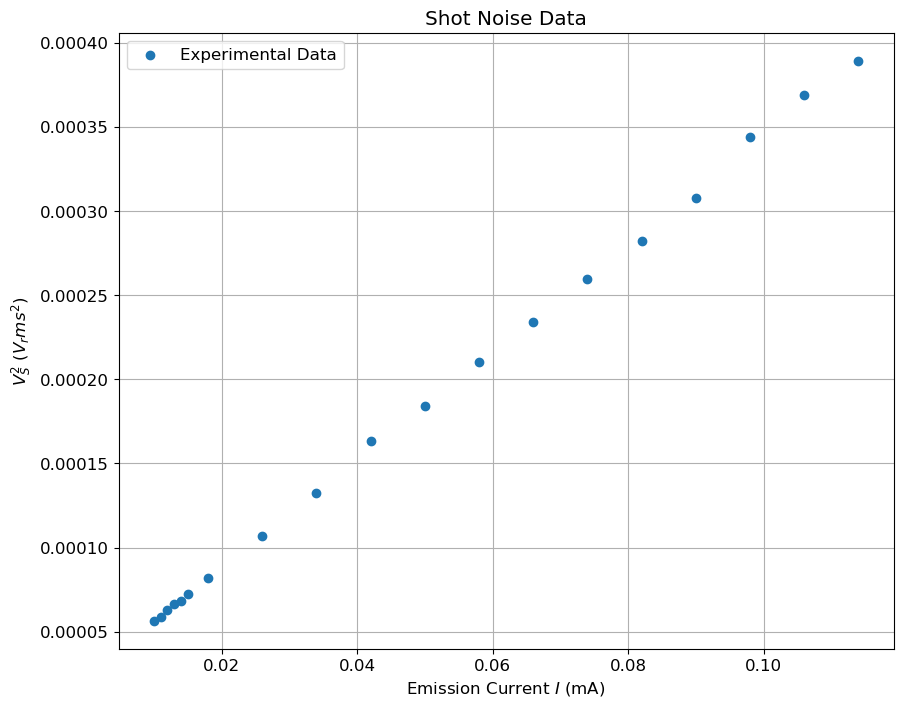

In [72]:
## transform the data, like you did with Johnson noise
sdata['V^2_rms (V^2)']  = sdata['V_rms (V)']**2
plt.figure()
plt.scatter(sdata['Emission Current (mA)'], sdata['V^2_rms (V^2)'], label='Experimental Data')
plt.grid()  # Turn on the grid
plt.title('Shot Noise Data')  # make a plot title
plt.ylabel(r'$V^2_S$ $(V_rms^2)$')  # Make an axis label.  Note the $$ to typeset math
plt.xlabel(r'Emission Current $I$ (mA)')  #Another axis label
plt.legend()
plt.show()

### Then fit it and plot it

**Note:** Shot nose data may not be "pure" in that you will see a notable deviation from the expected behavior.  The data may be affected by $1/f$ noise in the vacuum diode that gets worse with higher emission current.   This effect is reduced in the newer shot noise apparatus that uses a different vacuum diode.  If you see a notable curve in your measured voltage, you may try a couple of work-arounds to obtain the linear part of the noise-squared vs emission current:

1. Select a portion of the data to fit, where the $1/f$ problem is less, near the low-emission current end of the data set.
2. Make a ploynomial fit and look at the linear term.

You should try a couple of options and compare your results with your partners.  You only need to do this if you see the $1/f$ effect.

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 19
    # variables        = 2
    chi-square         = 1.3371e-10
    reduced chi-square = 7.8653e-12
    Akaike info crit   = -483.915983
    Bayesian info crit = -482.027105
    R-squared          = 0.99944649
[[Variables]]
    slope:      0.00321103 +/- 1.8327e-05 (0.57%) (init = 0.00321103)
    intercept:  2.3895e-05 +/- 1.1063e-06 (4.63%) (init = 2.389544e-05)

Slope = 0.003211±0.000018


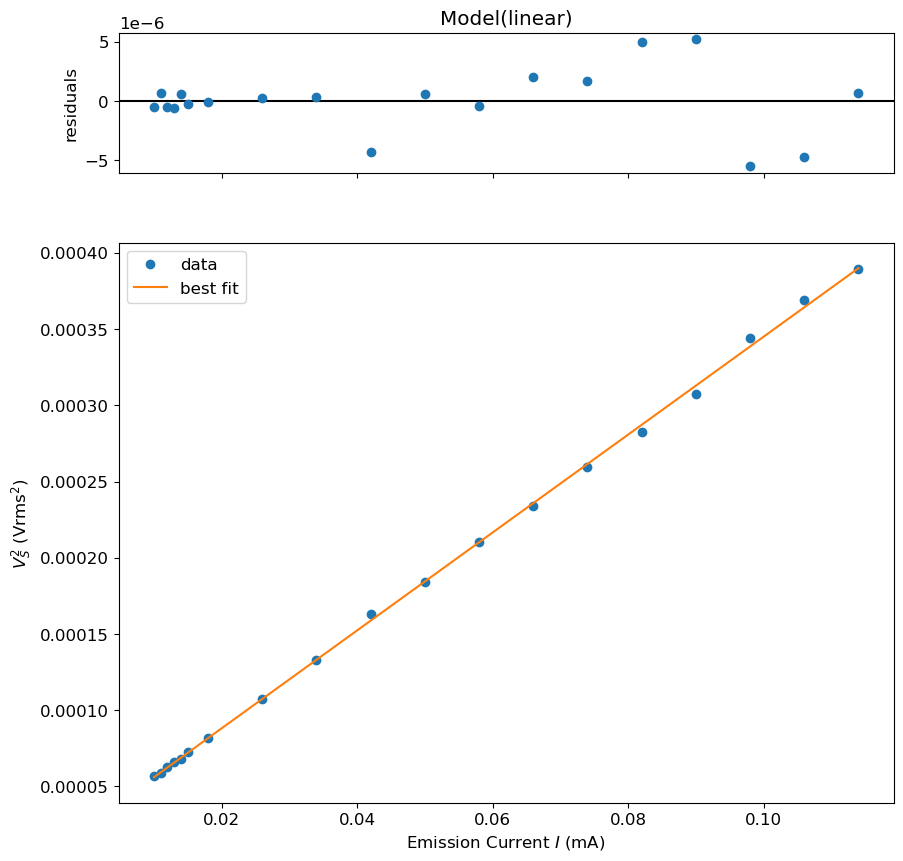

In [73]:
## First the fit. Try the whole data set first.
shotfit = line_fit_and_plot(sdata['Emission Current (mA)'], sdata['V^2_rms (V^2)'],
                                   xlabel=r'Emission Current $I$ (mA)', ylabel=r'$V^2_S$ (Vrms$^2$)')

# Obtain the slope and its uncertainty into an uncertainty object
slshot = get_uslope(shotfit)
intshot = get_uint(shotfit)
print('\nSlope = {:.2uP}'.format(slshot))


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 12
    # variables        = 2
    chi-square         = 1.8493e-11
    reduced chi-square = 1.8493e-12
    Akaike info crit   = -322.382608
    Bayesian info crit = -321.412795
    R-squared          = 0.99942635
[[Variables]]
    slope:      0.00322995 +/- 2.4471e-05 (0.76%) (init = 0.003229946)
    intercept:  2.3775e-05 +/- 7.3204e-07 (3.08%) (init = 2.377507e-05)

Slope = 0.003230±0.000024


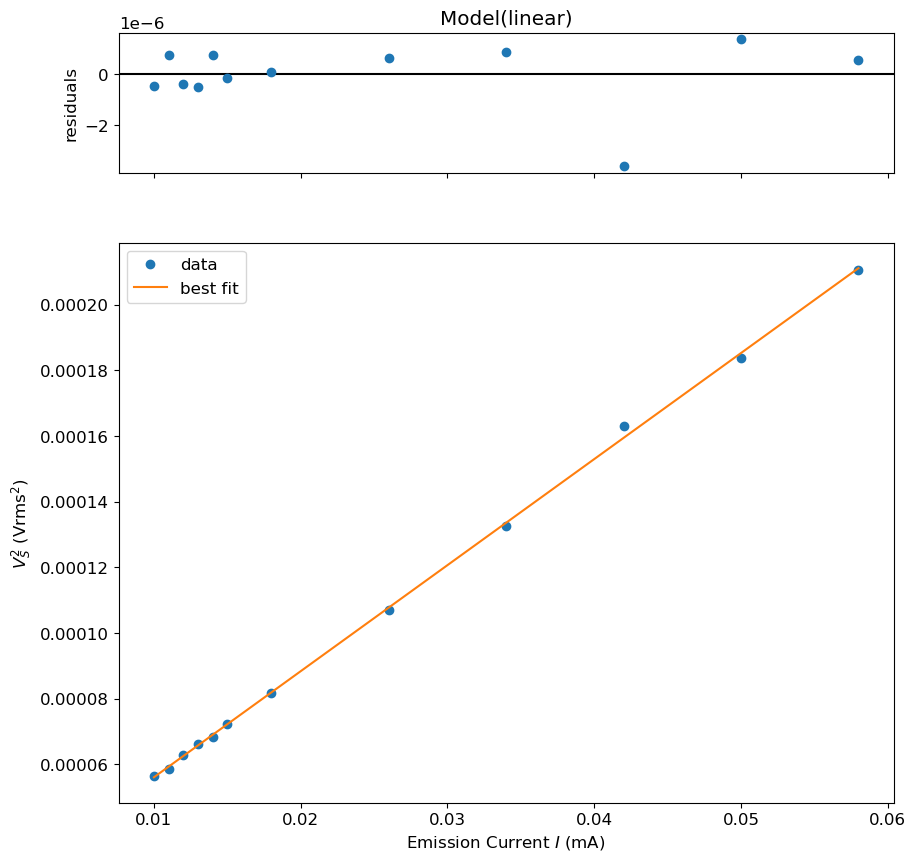

In [74]:
## Then try the lower half of the data, before the 1/f takes over, if necessary

shotfit2 = line_fit_and_plot(sdata['Emission Current (mA)'].values[:-7], sdata['V^2_rms (V^2)'].values[:-7],
                                   xlabel=r'Emission Current $I$ (mA)', ylabel=r'$V^2_S$ (Vrms$^2$)')

# Obtain the slope and its uncertainty into an uncertainty object
slshot2 = get_uslope(shotfit2)
intshot2 = get_uint(shotfit2)
print('\nSlope = {:.2uP}'.format(slshot2))

Optional: Another way out of the $1/f$ problem is to fit a quadratic, and use the linear-term coefficient as the initial slope.

[[Model]]
    Model(parabolic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 19
    # variables        = 3
    chi-square         = 1.2618e-10
    reduced chi-square = 7.8862e-12
    Akaike info crit   = -483.017296
    Bayesian info crit = -480.183979
    R-squared          = 0.99947766
[[Variables]]
    a:  6.8048e-04 +/- 6.9639e-04 (102.34%) (init = 0.000680477)
    b:  0.00313383 +/- 8.1109e-05 (2.59%) (init = 0.00313383)
    c:  2.5207e-05 +/- 1.7402e-06 (6.90%) (init = 2.52069e-05)

Slope = 0.003134±0.000081


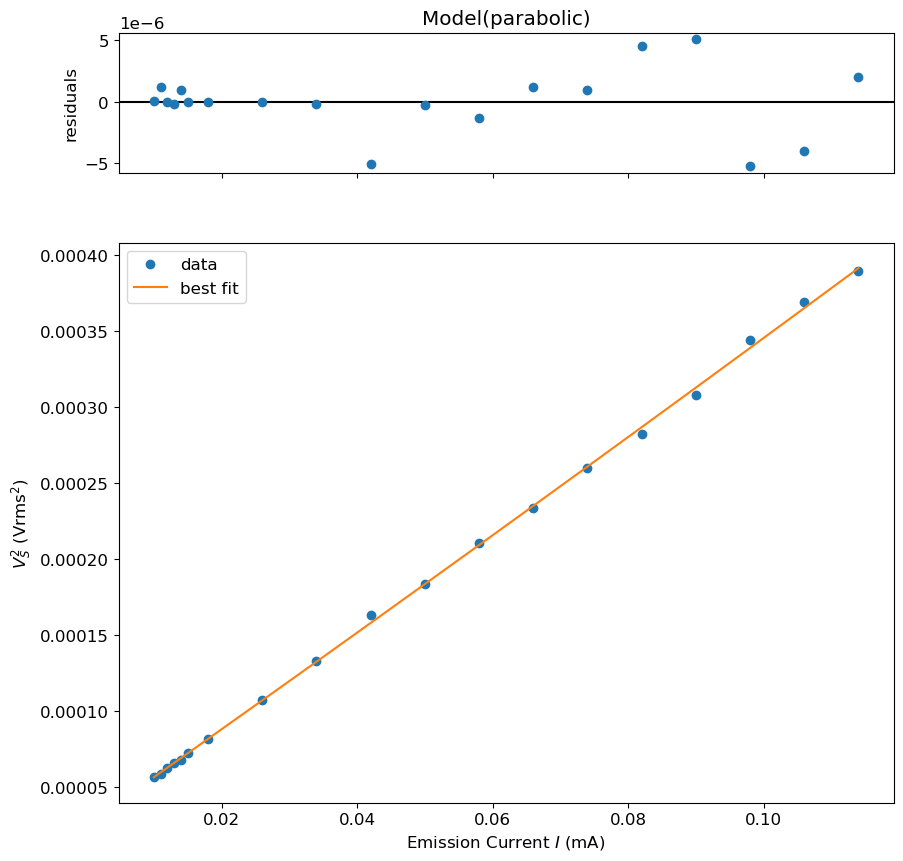

In [75]:
## To do this, you need a different fitting model
#  Below will get you started, but you need to study the docs to understand the parameters.

from lmfit.models import QuadraticModel
shotfit3 = line_fit_and_plot(sdata['Emission Current (mA)'], sdata['V^2_rms (V^2)'],
                                   xlabel=r'Emission Current $I$ (mA)', ylabel=r'$V^2_S$ (Vrms$^2$)', model=QuadraticModel())

# Obtain the slope and its uncertainty into an uncertainty object
slshot3 = get_uqslope(shotfit3)
intshot3 = get_uqint(shotfit3)
print('\nSlope = {:.2uP}'.format(slshot3))

## You do the rest

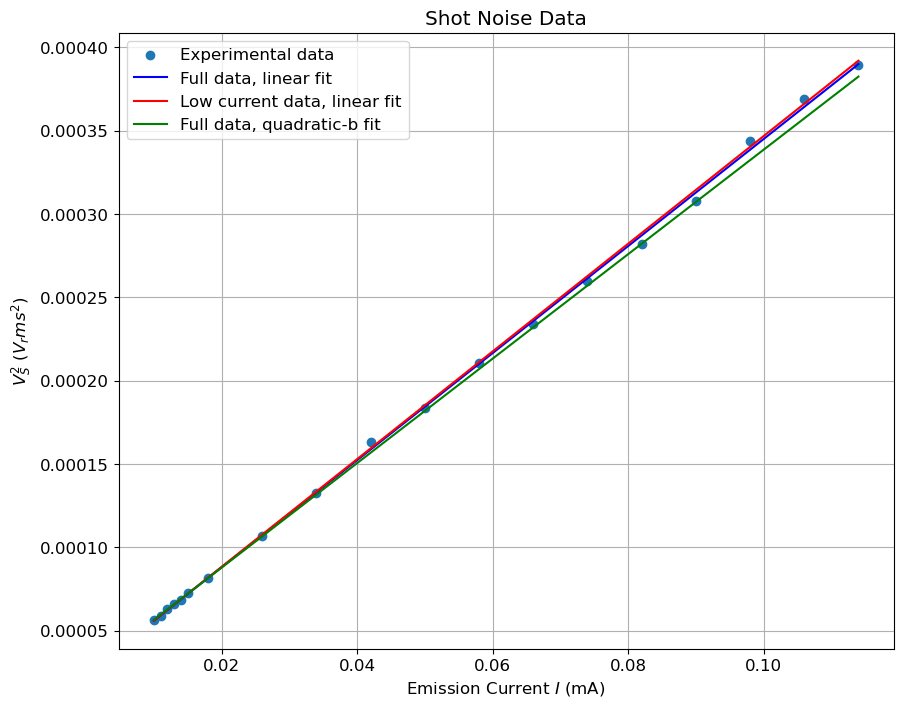

In [76]:
## Now make a nice plot of all fits over the data points
xrange = np.linspace(sdata['Emission Current (mA)'].values.min(),sdata['Emission Current (mA)'].values.max(), 100)


plt.figure()
plt.scatter(sdata['Emission Current (mA)'], sdata['V^2_rms (V^2)'], label = 'Experimental data')
plt.plot(xrange, xrange*slshot.n + intshot.n, color = 'blue', label = 'Full data, linear fit')
plt.plot(xrange, xrange*slshot2.n + intshot2.n, color = 'red', label = 'Low current data, linear fit')
plt.plot(xrange, xrange*slshot3.n + intshot3.n, color = 'green', label = 'Full data, quadratic-b fit')
plt.grid()  # Turn on the grid
plt.title('Shot Noise Data')  # make a plot title
plt.ylabel(r'$V^2_S$ $(V_rms^2)$')  # Make an axis label.  Note the $$ to typeset math
plt.xlabel(r'Emission Current $I$ (mA)')  #Another axis label
plt.legend()
plt.show()


### Calculate Electron Charge

Use the fit results, propagate the uncertainty, and find a value for $e$.

In [77]:
## Calculate e with uncertainty and print it (with units) 
## Compare with the accepted value

# You will need the correct sensing resistance in the shot noise box:
# Older box:
# R_load = unc.ufloat(4976,1) # Load resistance of shot noise box in ohms 
# Newer box:
R_load = unc.ufloat(10000.0,10)

# Calculate the result, and propagate the uncertainty.
q1 = slshot*1000/ (G**2*R_load**2*2*bandwidth)
q2 = slshot2*1000/ (G**2*R_load**2*2*bandwidth)
q3 = slshot3*1000/ (G**2*R_load**2*2*bandwidth)

# Use whatever you need below
print('\nElectron charge from whole data set = {:.2uP} C'.format(q1))
print('Electron charge from partial data set = {:.2uP} C'.format(q2))
print('Electron charge from quadratic fit = {:.2uP} C'.format(q3))
print('\nAccepted value = {:.4g} C'.format(const.e))


Electron charge from whole data set = (1.567±0.051)×10⁻¹⁹ C
Electron charge from partial data set = (1.576±0.052)×10⁻¹⁹ C
Electron charge from quadratic fit = (1.529±0.063)×10⁻¹⁹ C

Accepted value = 1.602e-19 C


## Optional Exercise: Frequency analysis

I am going to use this space to get some stuff done for the notebook, where we fourier decompose different waveforms.

In [78]:
## Read in the data
waveforms = pd.read_csv('waveforms.csv')

display(waveforms)
#normalize the components to have the largest one be 1
waveforms.iloc[:, 1:] = waveforms.iloc[:, 1:].div(waveforms.iloc[:, 1:].max())
#in Hz
waveforms['Frequencies (Hz)'] = waveforms['Frequencies (kHz)']*1000
display(waveforms)

,Frequencies (kHz),Sine Amplitude (mV),Square Amplitude (V),Triangle Amplitude (V),Saw Amplitude (V)
0,4,1007,1274.00,881.400,637.40
1,8,0,0.00,0.000,318.70
2,12,0,425.20,90.110,212.70
3,16,0,0.00,0.000,159.60
4,20,0,255.20,32.500,127.60
5,24,0,0.00,0.000,106.40
6,28,0,182.40,16.540,91.22
7,32,0,0.00,0.000,76.76
8,36,0,141.90,10.010,70.95
9,40,0,0.00,0.000,63.80


C:\Users\speed\AppData\Local\Temp\ipykernel_18316\2788300106.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     1.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
Name: Sine Amplitude (mV), dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  waveforms.iloc[:, 1:] = waveforms.iloc[:, 1:].div(waveforms.iloc[:, 1:].max())


,Frequencies (kHz),Sine Amplitude (mV),Square Amplitude (V),Triangle Amplitude (V),Saw Amplitude (V),Frequencies (Hz)
0,4,1.0,1.000000,1.000000,1.000000,4000
1,8,0.0,0.000000,0.000000,0.500000,8000
2,12,0.0,0.333752,0.102235,0.333699,12000
3,16,0.0,0.000000,0.000000,0.250392,16000
4,20,0.0,0.200314,0.036873,0.200188,20000
5,24,0.0,0.000000,0.000000,0.166928,24000
6,28,0.0,0.143171,0.018766,0.143113,28000
7,32,0.0,0.000000,0.000000,0.120427,32000
8,36,0.0,0.111381,0.011357,0.111312,36000
9,40,0.0,0.000000,0.000000,0.100094,40000


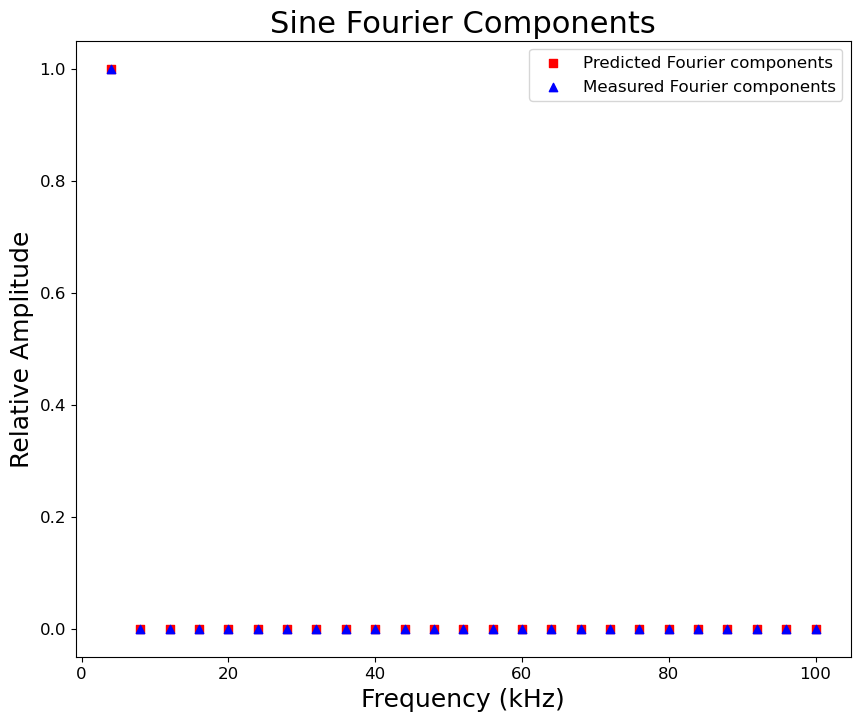

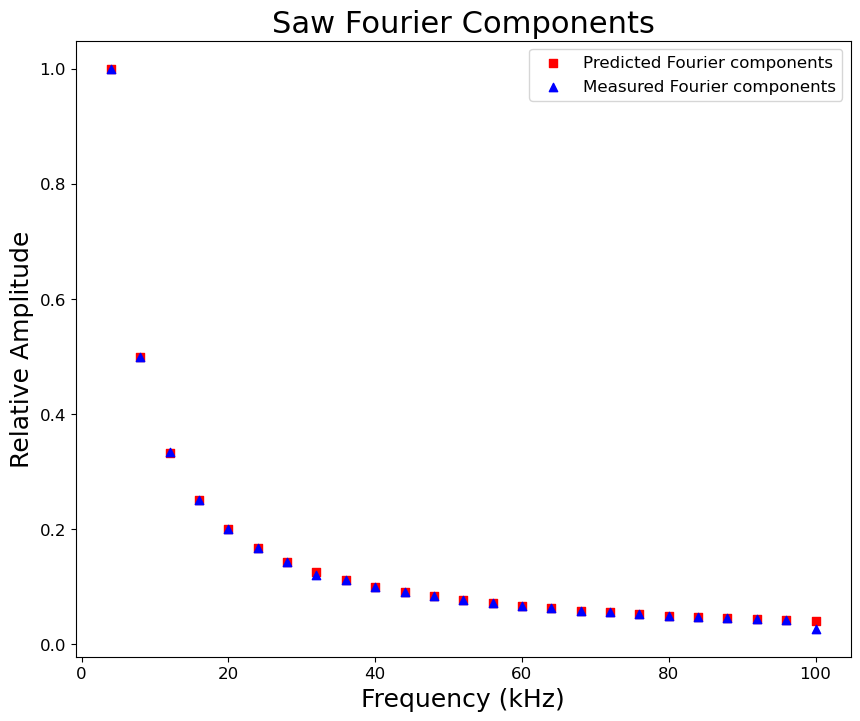

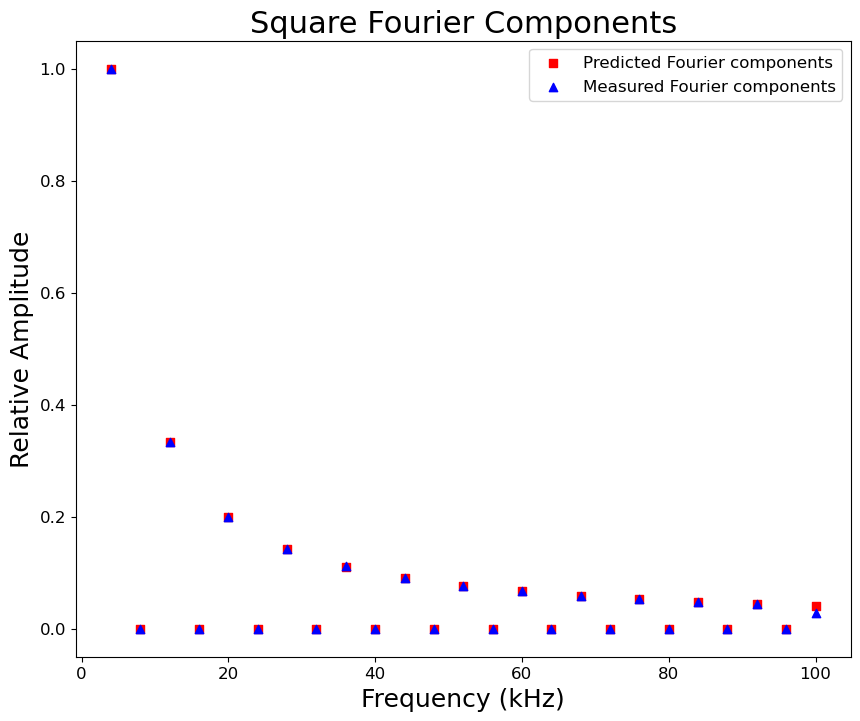

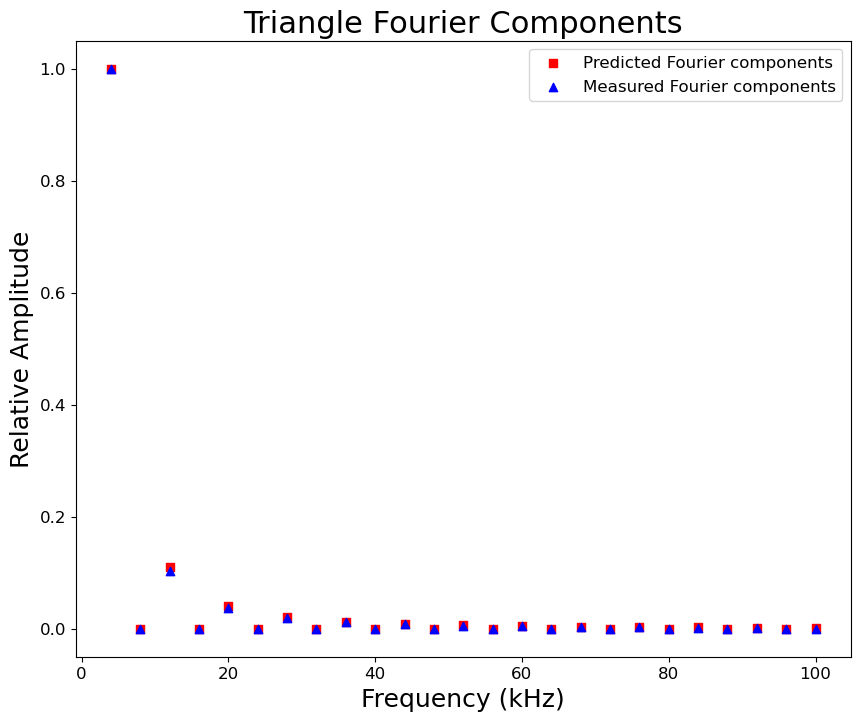

In [79]:
sinamp = np.zeros(waveforms['Frequencies (kHz)'].shape)
sqamp = np.zeros(waveforms['Frequencies (kHz)'].shape)
tramp = np.zeros(waveforms['Frequencies (kHz)'].shape)
sawamp = np.zeros(waveforms['Frequencies (kHz)'].shape)

#find predicted fourier coefficients
for i, freq in enumerate(waveforms['Frequencies (kHz)'].values):
    n = i+1
    if n == 1:
        sinamp[i] = 1
    sawamp[i] = (n)**(-1)
    if n %2 ==1:
        sqamp[i] = (n)**(-1)
        tramp[i] = (n)**(-2)
    else:
        sqamp[i] = 0
        tramp[i] = 0
        
waveforms['Predicted Sines'] = sinamp/np.max(sinamp)
waveforms['Predicted Saws'] = sawamp/np.max(sawamp)
waveforms['Predicted Triangles'] = tramp/np.max(tramp)
waveforms['Predicted Squares'] = sqamp/np.max(sqamp)

#plot the expected vs observed ones
plt.figure()
plt.scatter(waveforms['Frequencies (kHz)'], waveforms['Predicted Sines'], color = 'red', label = 'Predicted Fourier components', marker = 's')
plt.scatter(waveforms['Frequencies (kHz)'], waveforms['Sine Amplitude (mV)'], color = 'blue', label = 'Measured Fourier components', marker = '^')
plt.xlabel('Frequency (kHz)', fontsize = 18)
plt.ylabel('Relative Amplitude', fontsize = 18)
plt.title('Sine Fourier Components', fontsize = 22)
plt.legend()
plt.show()

plt.figure()
plt.scatter(waveforms['Frequencies (kHz)'], waveforms['Predicted Saws'], color = 'red', label = 'Predicted Fourier components', marker = 's')
plt.scatter(waveforms['Frequencies (kHz)'], waveforms['Saw Amplitude (V)'], color = 'blue', label = 'Measured Fourier components', marker = '^')
plt.xlabel('Frequency (kHz)', fontsize = 18)
plt.ylabel('Relative Amplitude', fontsize = 18)
plt.title('Saw Fourier Components', fontsize = 22)
plt.legend()
plt.show()

plt.figure()
plt.scatter(waveforms['Frequencies (kHz)'], waveforms['Predicted Squares'], color = 'red', label = 'Predicted Fourier components', marker = 's')
plt.scatter(waveforms['Frequencies (kHz)'], waveforms['Square Amplitude (V)'], color = 'blue', label = 'Measured Fourier components', marker = '^')
plt.xlabel('Frequency (kHz)', fontsize = 18)
plt.ylabel('Relative Amplitude', fontsize = 18)
plt.title('Square Fourier Components', fontsize = 22)
plt.legend()
plt.show()

plt.figure()
plt.scatter(waveforms['Frequencies (kHz)'], waveforms['Predicted Triangles'], color = 'red', label = 'Predicted Fourier components', marker = 's')
plt.scatter(waveforms['Frequencies (kHz)'], waveforms['Triangle Amplitude (V)'], color = 'blue', label = 'Measured Fourier components', marker = '^')
plt.xlabel('Frequency (kHz)', fontsize = 18)
plt.ylabel('Relative Amplitude', fontsize = 18)
plt.title('Triangle Fourier Components', fontsize = 22)
plt.legend()
plt.show()

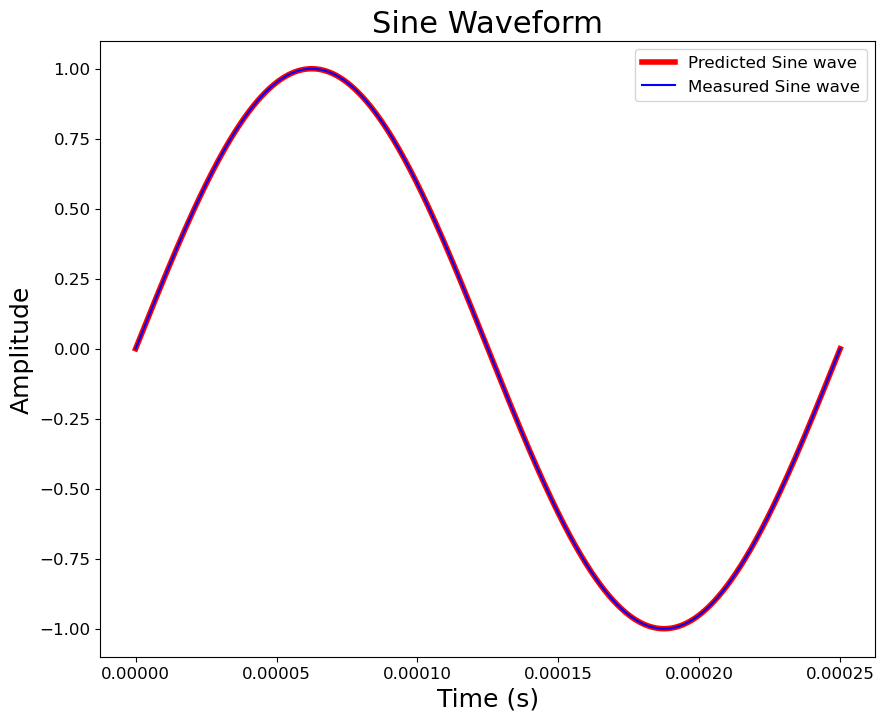

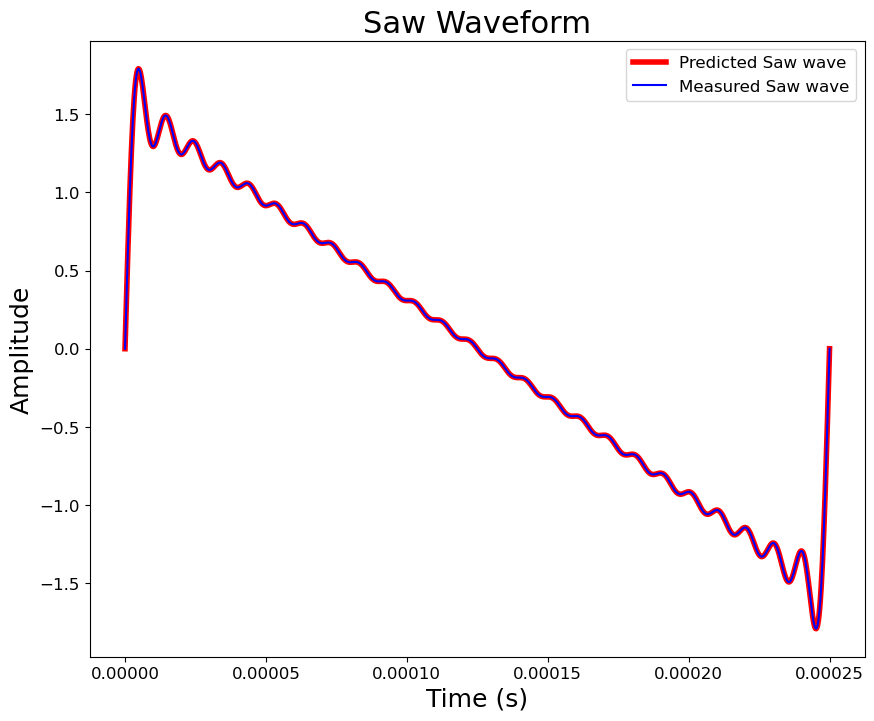

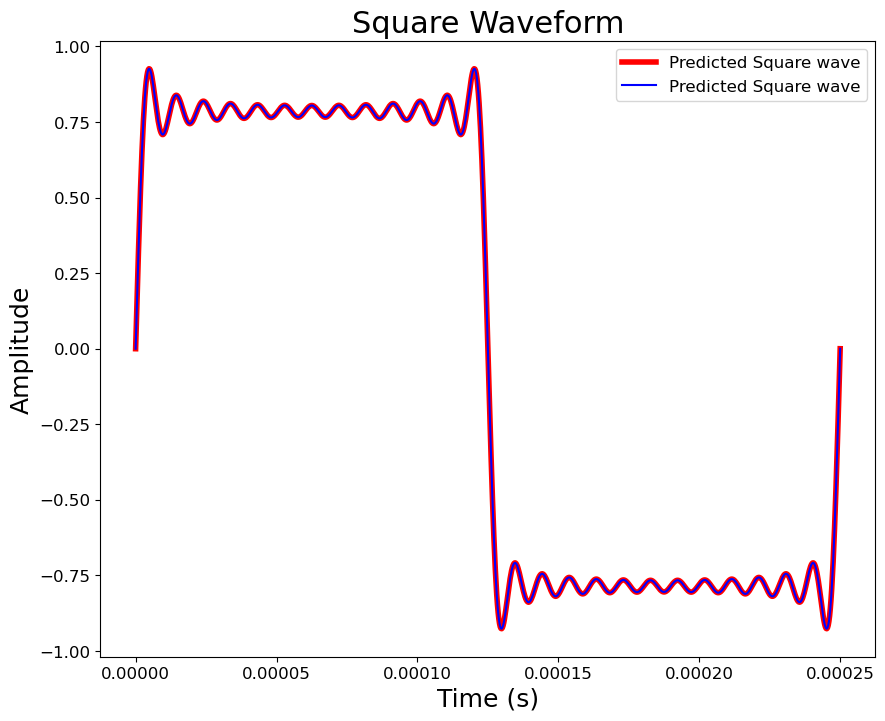

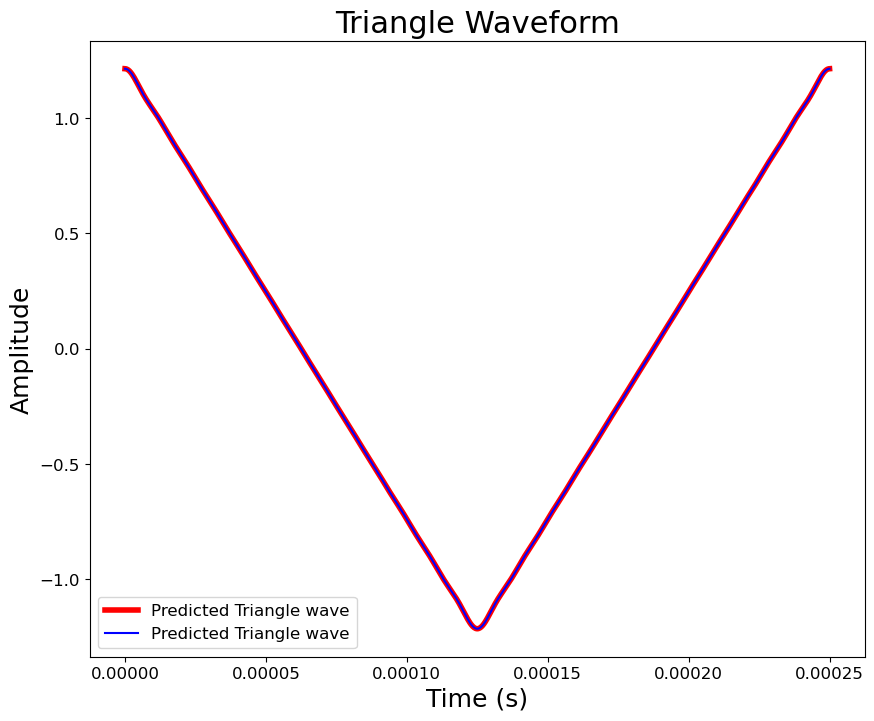

In [85]:
xvalues= np.linspace(0, 1/4000, 1000)
sinpred = np.zeros(1000)
sinmeas = np.zeros(1000)

#make waveforms with fourier components (sum of amplitude times sin of that component)
for f, c1,c2 in zip(waveforms['Frequencies (Hz)'], waveforms['Predicted Sines'], waveforms['Sine Amplitude (mV)']):
    sinpred = sinpred + c1*np.sin(2*np.pi*f*xvalues)
    sinmeas = sinmeas + c2*np.sin(2*np.pi*f*xvalues)
    
#plot them
plt.plot(xvalues, sinpred, color = 'red', label = 'Predicted Sine wave', linewidth = 4)
plt.plot(xvalues, sinpred, color = 'blue', label = 'Measured Sine wave')
plt.xlabel('Time (s)', fontsize = 18)
plt.ylabel('Amplitude', fontsize = 18)
plt.title('Sine Waveform', fontsize =22)
plt.legend()
plt.show()


sawpred = np.zeros(1000)
sawmeas = np.zeros(1000)
for f, c1,c2 in zip(waveforms['Frequencies (Hz)'], waveforms['Predicted Saws'], waveforms['Saw Amplitude (V)']):
    sawpred = sawpred + c1*np.sin(2*np.pi*f*xvalues)
    sawmeas = sawmeas + c2*np.sin(2*np.pi*f*xvalues)
    
plt.plot(xvalues, sawpred, color = 'red', label = 'Predicted Saw wave', linewidth = 4)
plt.plot(xvalues, sawpred, color = 'blue', label = 'Measured Saw wave')
plt.xlabel('Time (s)', fontsize = 18)
plt.ylabel('Amplitude', fontsize = 18)
plt.title('Saw Waveform', fontsize =22)
plt.legend()
plt.show()


sqpred = np.zeros(1000)
sqmeas = np.zeros(1000)
for f, c1,c2 in zip(waveforms['Frequencies (Hz)'], waveforms['Predicted Squares'], waveforms['Square Amplitude (V)']):
    sqpred = sqpred + c1*np.sin(2*np.pi*f*xvalues)
    sqmeas = sqmeas + c2*np.sin(2*np.pi*f*xvalues)
    
plt.plot(xvalues, sqpred, color = 'red', label = 'Predicted Square wave', linewidth = 4)
plt.plot(xvalues, sqpred, color = 'blue', label = 'Predicted Square wave')
plt.xlabel('Time (s)', fontsize = 18)
plt.ylabel('Amplitude', fontsize = 18)
plt.title('Square Waveform', fontsize =22)
plt.legend()
plt.show()


tpred = np.zeros(1000)
tmeas = np.zeros(1000)
for f, c1,c2 in zip(waveforms['Frequencies (Hz)'], waveforms['Predicted Triangles'], waveforms['Triangle Amplitude (V)']):
    tpred = tpred + c1*np.cos(2*np.pi*f*xvalues)
    tmeas = tmeas + c2*np.cos(2*np.pi*f*xvalues)
    
plt.plot(xvalues, tpred, color = 'red', label = 'Predicted Triangle wave', linewidth = 4)
plt.plot(xvalues, tpred, color = 'blue', label = 'Predicted Triangle wave')
plt.xlabel('Time (s)', fontsize = 18)
plt.ylabel('Amplitude', fontsize = 18)
plt.title('Triangle Waveform', fontsize =22)
plt.legend()
plt.show()